# Лабораторная работа №6. Машины опорных векторов и ядра скалярного произведения

В данной лабораторной работе рассматривается использование машин опорных векторов для решения задач классификации и регрессии.

In [1]:
import numpy as np
import sklearn as sk
import sklearn.datasets
import sklearn.model_selection
import sklearn.svm 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.grid'] = True
plt.rcParams['figure.constrained_layout.use'] = True

## Задание №1

Подготовьте обучающую и тестовую выборки.
Значение `random_state` соответствует номеру варианта.
Размер тестовой выборки должен составлять 20% от исходной выборки.

(800, 2) (800,)


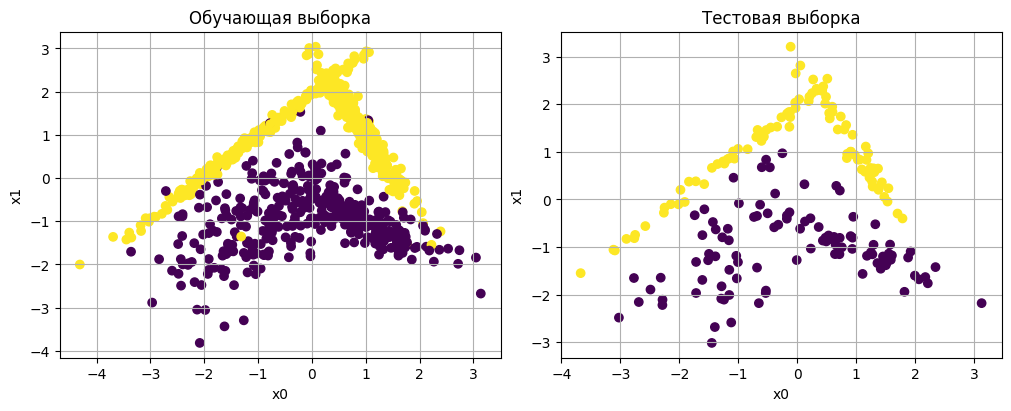

In [2]:
x, y = sk.datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=3)
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, random_state=42, test_size = 0.2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*5, 4))
ax0.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax0.set(xlabel='x0', ylabel='x1', title='Обучающая выборка')
ax1.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax1.set(xlabel='x0', ylabel='x1', title='Тестовая выборка')

print(x_train.shape, y_train.shape)

## Задание №2

Рассмотрим задачу классификации с использованием машин опорных векторов.
Визуализируйте разделение пространства признаков для следующих ядер:

* линейное,
* полиномиальные (порядков 2-5),
* радиальное RBF.

Для каждого из ядер найдите точность (accuracy) для обучающей и тестовой выборок, а также число используемых опорных векторов (сложность модели).
На основе полученных значений точности (accuracy) выберите наилучшую модель.
Для полиномиальных ядер в отчет включите только ту модель, которая дает наилучший результат.
Число опорных векторов - это сумма опорных векторов всех классов в переменной `n_support_`.

linear train score: 0.8775 test score: 0.885 n_support: 246
rbf train score: 0.9725 test score: 0.985 n_support: 106
poly2 train score: 0.57125 test score: 0.56 n_support: 755
poly3 train score: 0.89 test score: 0.87 n_support: 322
poly4 train score: 0.72625 test score: 0.74 n_support: 537
poly5 train score: 0.885 test score: 0.9 n_support: 414


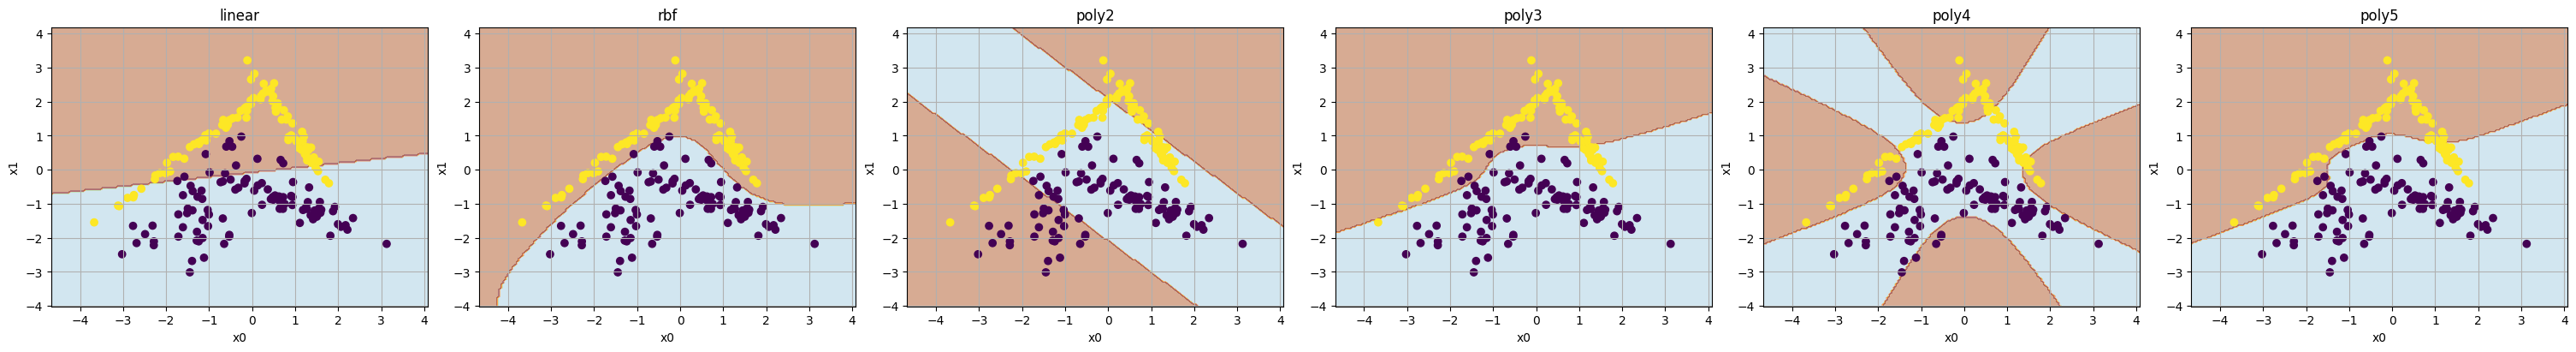

In [3]:
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

models = {'linear': sk.svm.SVC(kernel='linear'), 'rbf': sk.svm.SVC(kernel='rbf')}
for p in range(2, 6):
    models[f'poly{p}'] = sk.svm.SVC(kernel='poly', degree=p)

_, axes = plt.subplots(1, len(models), figsize=(len(models)*5, 4))
for (name, model), ax in zip(models.items(), axes):
    model.fit(x_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], x_test.shape[1] - 2))])
    ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.5)
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    ax.set(xlabel='x0', ylabel='x1', title=name)

    print(name, 'train score:', model.score(x_train, y_train), 'test score:', model.score(x_test, y_test), 'n_support:', model.n_support_.sum())

**Вопросы:**

1. Какая модель оказалась лучшей по точности классификации?
1. Какая модель использует наименьшее число опорных векторов?
1. Что можно сказать о влиянии числа опорных векторов на качество модели?

**Ответы:**

1. Наилучшую точность показала радиальная RBF модель.
1. Наименьшее число опорных векторов использует радиальная RBF модель.
1. В рассматриваемой задаче увеличение числа опорных векторов влечёт уменьшение точности распознавания.

## Задание №3

Пусть задача минимизации функции стоимости имеет вид
$$
\frac{1}{2} \lVert\mathbf{w}\rVert^2 + C \sum_{i=0}^{N-1} \xi_i \rightarrow \min_{w,\xi},
$$
а преобразование пространства признаков осуществляется ядром
$$
RBF(x, y) = \exp\left( -\frac{\lVert x - y \rVert^2}{\sigma^2} \right),
$$
где $C > 0$, $\sigma > 0$.

**Замечания:**

* Оптимальные параметры следует выбирать по наилучшему значению на тестовой выборке.
Если в исследуемой зависимости наблюдается несколько пиков с наилучшим значением, то стоит принять в рассмотрение также результат на обучающей выборке.
* Параметру $\sigma$ в `SVC` соответствует параметр `gamma`.
* Выбирайте диапазоны параметроы $C$ и $\sigma$ такими, чтобы было хорошо видно поведение зависимостей на всех графиках.
* Для генерации параметров $C$ используйте `np.linspace`, для $\sigma$ - `np.logspace`.
* Ширина зазора - это квадратичная норма от результата `desision_function` (помните, что в `numpy` функция `np.linalg.norm` выдаёт ненормированную норму).

### Задание №3.1

* Постройте графики зависимостей числа опорных векторов и ширины зазора от параметра регуляризации $C$, приняв $\sigma$ равным единице.
* Постройте графики зависимостей точности (accuracy) от параметра $C$ для обучающей и тестовой выборок, на основе чего выберите оптимальный параметр $C$.

Optimal C = 3.0, test accuracy = 1.0, train accuracy = 0.97875
CPU times: user 1.38 s, sys: 2.33 ms, total: 1.39 s
Wall time: 1.39 s


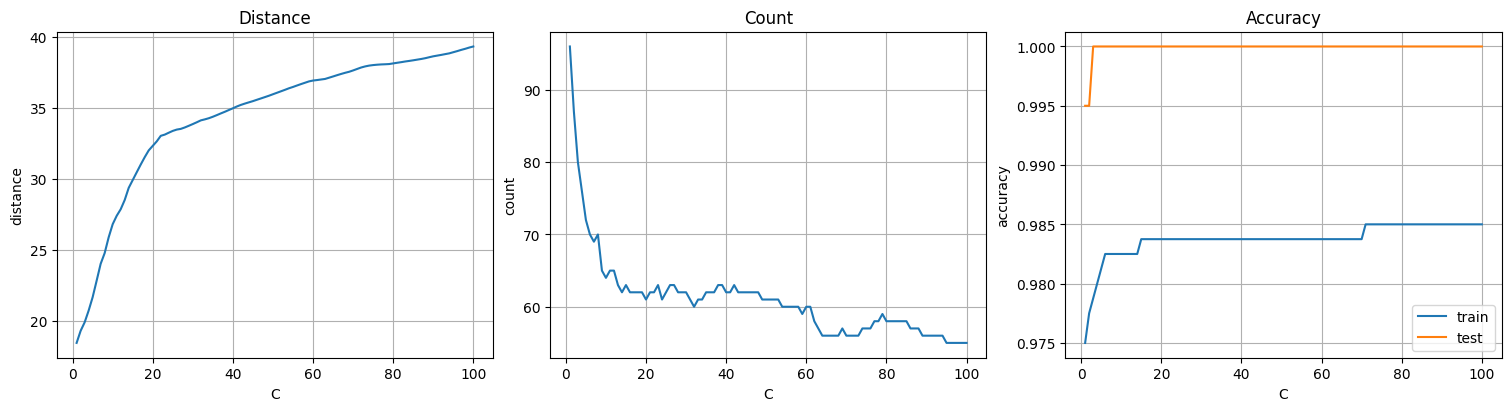

In [4]:
%%time

param_C = np.linspace(1, 100, 100)
metrics = {'distance': [], 'count': [], 'train': [], 'test': []}
for C in param_C:
    model = sk.svm.SVC(C=C, gamma=1, decision_function_shape='ovo')
    model.fit(x_train, y_train)
    metrics['distance'].append(np.linalg.norm(model.decision_function(x_test)))
    metrics['count'].append(model.n_support_.sum())
    metrics['train'].append(model.score(x_train, y_train))
    metrics['test'].append(model.score(x_test, y_test))

_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3*5, 4))
ax0.plot(param_C, metrics['distance'])
ax0.set(xlabel = 'C', ylabel = 'distance', title='Distance')
ax1.plot(param_C, metrics['count'])
ax1.set(xlabel = 'C', ylabel = 'count', title='Count')
ax2.plot(param_C, metrics['train'], label = 'train')
ax2.plot(param_C, metrics['test'], label = 'test')
ax2.set(xlabel = 'C', ylabel = 'accuracy', title='Accuracy')
ax2.legend(loc='lower right')

idx = np.argmax(metrics['test'])
C_opt = param_C[idx]
print(f"Optimal C = {C_opt}, test accuracy = {metrics['test'][idx]}, train accuracy = {metrics['train'][idx]}")

**Вопросы:**

1. Какое значение принимает оптимальный параметр регуляризации `C`?
1. Как ведёт себя ширина зазора при увеличении параметра `C`?
1. Что происходит с количеством опорных векторов при увеличении параметра `C`?

**Ответы:**

1. Оптимальный параметр регуляризации равен 3.
1. Ширина зазора увеличивается с увеличением параметра C.
1. Количество опорных векторов имеет тенденцию к уменьшению при увеличении параметра C, однако на каких-то участках это правило не соблюдается.

### Задание №3.2

* Постройте графики зависимостей числа опорных векторов и ширины зазора от параметра $\sigma$, используя найденное оптимальное $C$.
* Постройте графики зависимостей точности (accuracy) от параметра $\sigma$ для обучающей и тестовой выборок, на основе чего выберите оптимальный параметр $\sigma$.
* Для параметра $\sigma$ используйте логарифмический масштаб.

Optimal sigma = 0.18307382802953678, test accuracy = 1.0, train accuracy = 1.0
CPU times: user 4.58 s, sys: 3.77 ms, total: 4.58 s
Wall time: 4.59 s


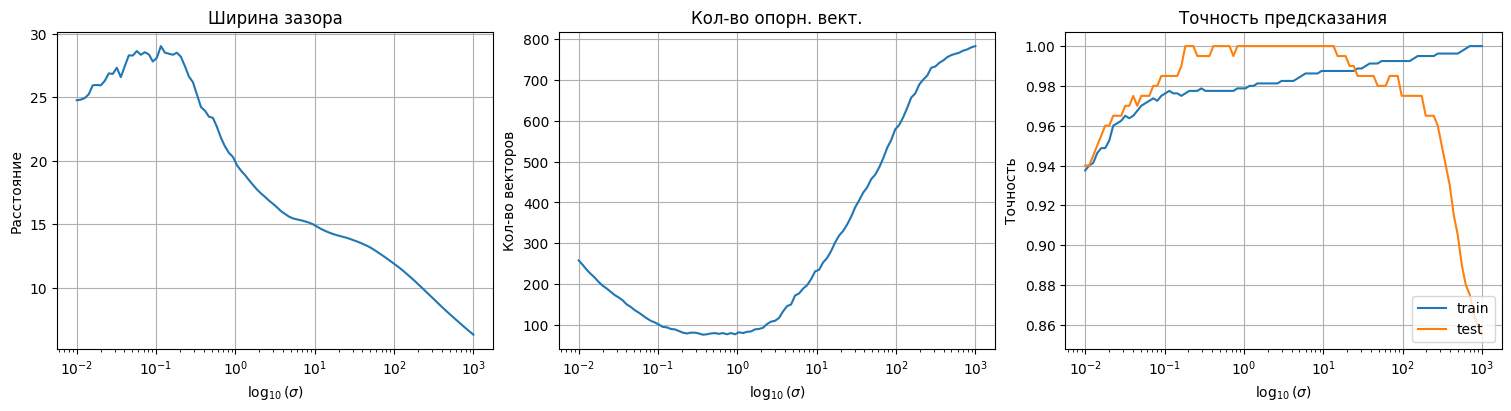

In [5]:
%%time

param_sigma = np.logspace(-2, 3, 100)
metrics = {'distance': [], 'count': [], 'train': [], 'test': []}
for sigma in param_sigma:
    model = sk.svm.SVC(C=C_opt, gamma=sigma, decision_function_shape='ovo')
    model.fit(x_train, y_train)
    metrics['distance'].append(np.linalg.norm(model.decision_function(x_test)))
    metrics['count'].append(model.n_support_.sum())
    metrics['train'].append(model.score(x_train, y_train))
    metrics['test'].append(model.score(x_test, y_test))

_, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3*5, 4))
ax0.semilogx(param_sigma, metrics['distance'])
ax0.set(xlabel='$\log_{10}(\sigma)$', ylabel='Расстояние', title='Ширина зазора')
ax1.semilogx(param_sigma, metrics['count'])
ax1.set(xlabel='$\log_{10}(\sigma)$', ylabel='Кол-во векторов', title='Кол-во опорн. вект.')
ax2.semilogx(param_sigma, metrics['train'], label = 'train')
ax2.semilogx(param_sigma, metrics['test'], label = 'test')
ax2.set(xlabel='$\log_{10}(\sigma)$', ylabel='Точность', title='Точность предсказания')
ax2.legend(loc='lower right')

idx = np.argmax(metrics['test'])
sigma_opt = param_sigma[idx]
print(f"Optimal sigma = {sigma_opt}, test accuracy = {metrics['test'][idx]}, train accuracy = {metrics['test'][idx]}")

**Вопросы:**

1. Как ведёт себя значение ширины зазора при изменении значения параметра $\sigma$?
1. Как изменяется число опорных векторов при уменьшении/увеличении значения парметра $\sigma$?
1. Удалось ли улучшить результаты классификации?

**Ответы:**

1. При увеличении значения параметра $\sigma$ ширина зазора растёт, достигая пикового значения, после чего монотонно уменьшается.
1. При увеличении значения параметра $\sigma$ количество опорных векторов уменьшается, достигая наименьшего значения, после чего монотонно растёт.
1. Подбором параметра $\sigma$ удалось достигнуть точности 100% на тестовом наборе.

### Задание №3.3

Визуализируйте разделение пространства признаков для наилучшей модели.

poly5 train score: 0.97625 test score: 1.0 n_support: 85


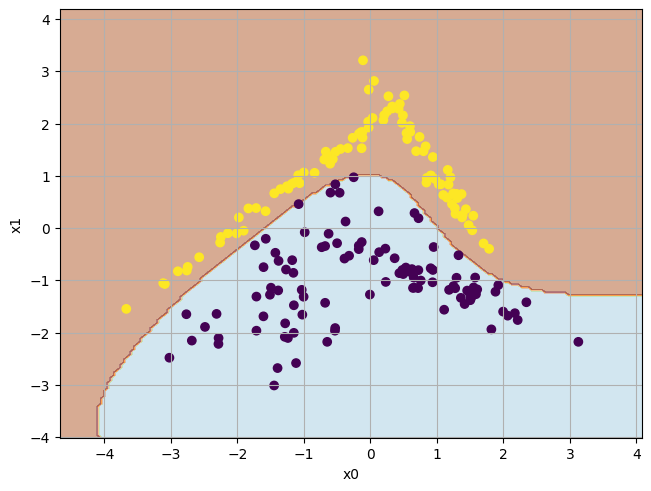

In [6]:
model = sk.svm.SVC(kernel='rbf', C=C_opt, gamma=sigma_opt)
model.fit(x_train,y_train)
Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], x_test.shape[1] - 2))])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.xlabel('x0')
plt.ylabel('x1')

print(name, 'train score:', model.score(x_train, y_train), 'test score:', model.score(x_test, y_test), 'n_support:', model.n_support_.sum())

**Вопросы:**

* Удалось ли увеличить качество модели (со скольких до скольких) по сравнению с предыдущим заданием?
Как при этом изменилась форма разделяющей поверхности? 
* Сделайте вывод о влиянии параметров $C$ и $\sigma$ на сложность модели и ширину зазора.

**Ответы:**

1. Удалось повысить точность на тестовой выборки с 0.985 до 1.0. Форма разделяющей поверхность изменилась незначительно.
1. Подбор параметров $C$ ($\sigma$) позволяет уменьшить (увеличить) ширину зазора, увеличив (уменьшив) при этом сложность модели.

## Задание №4

Подготовьте датасет с нелинейными данными. Координата `x` генериурется как отрезок $[-1; 1]$ в количестве 100 отсчётов, `y` генерируется согласно варианту.
Разделите датасет на обучающую и тестовую выборки.
Размер тестовой выборки следует выбрать равным 20% от размера всей выборки.

Функция для генерации `y` компоненты датасета (выбирается согласно формуле `1 + (<порядковый номер> % 2)`:

1. `np.arctan(A * x - 0.23) + 0.1`
1. `np.sin(A * x + 0.1) - 0.43`

Число `A` вычисляется по формуле `4 + (<порядковый номер> % 5)`.

(80, 1) (80,)


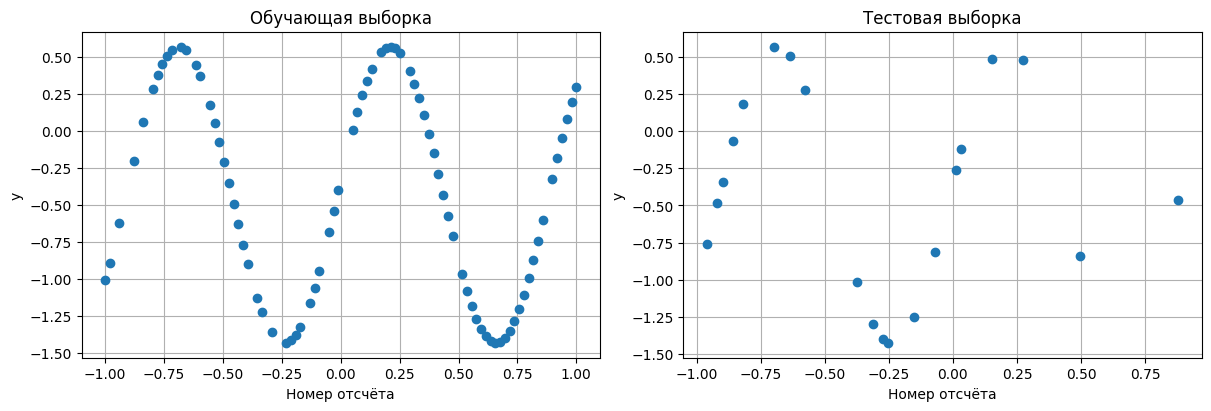

In [7]:
x = np.linspace(-1.0, 1.0, 100)
case = 3
A = 4 + (case % 5)
y = np.arctan(A * x - 0.23) + 0.1 if 1 + (case % 2) == 1 else np.sin(A * x + 0.1) - 0.43
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(np.expand_dims(x, -1), y, test_size=0.2, random_state=78)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))
ax0.plot(x_train, y_train, 'o')
ax0.set(xlabel='Номер отсчёта', ylabel='y', title='Обучающая выборка')
ax1.plot(x_test, y_test, 'o')
ax1.set(xlabel='Номер отсчёта', ylabel='y', title='Тестовая выборка')
print(x_train.shape, y_train.shape)

## Задание №5

Рассмотрим задачу регрессии с использованием машин опорных векторов (`sk.svm.SVR`).
Постройте графики, на которых изображены истинные и предсказанные значения для следующих ядер:

* линейное,
* полиномиальные (порядков 2-10),
* радиальное RBF.

Для каждого из ядер найдите MSE-ошибки на обучающей и тестовой выборках.
На основе полученных значений MSE выберите наилучшую модель.
Для полиномиальных ядер в отчет включите только ту модель, которая дает наилучший результат.

linear train MSE: 0.45079980740884845 test MSE: 0.4705569254200276 n_support: 76
rbf train MSE: 0.0462706388918927 test MSE: 0.07460827312618162 n_support: 62
poly2 train MSE: 0.47163047566267935 test MSE: 0.4378354979773869 n_support: 76
poly3 train MSE: 0.4577707012279605 test MSE: 0.4328450729622556 n_support: 76
poly4 train MSE: 0.4726469881810521 test MSE: 0.4321450538563033 n_support: 75
poly5 train MSE: 0.4745053926529067 test MSE: 0.44763402236676997 n_support: 75
poly6 train MSE: 0.4729205248748601 test MSE: 0.441154759424474 n_support: 74
poly7 train MSE: 0.47544446969839305 test MSE: 0.4636352698075976 n_support: 73
poly8 train MSE: 0.4784405452474907 test MSE: 0.45417444367942883 n_support: 73
poly9 train MSE: 0.46601114081252193 test MSE: 0.45581541187201025 n_support: 72
poly10 train MSE: 0.48233881192182687 test MSE: 0.4614558689170155 n_support: 73


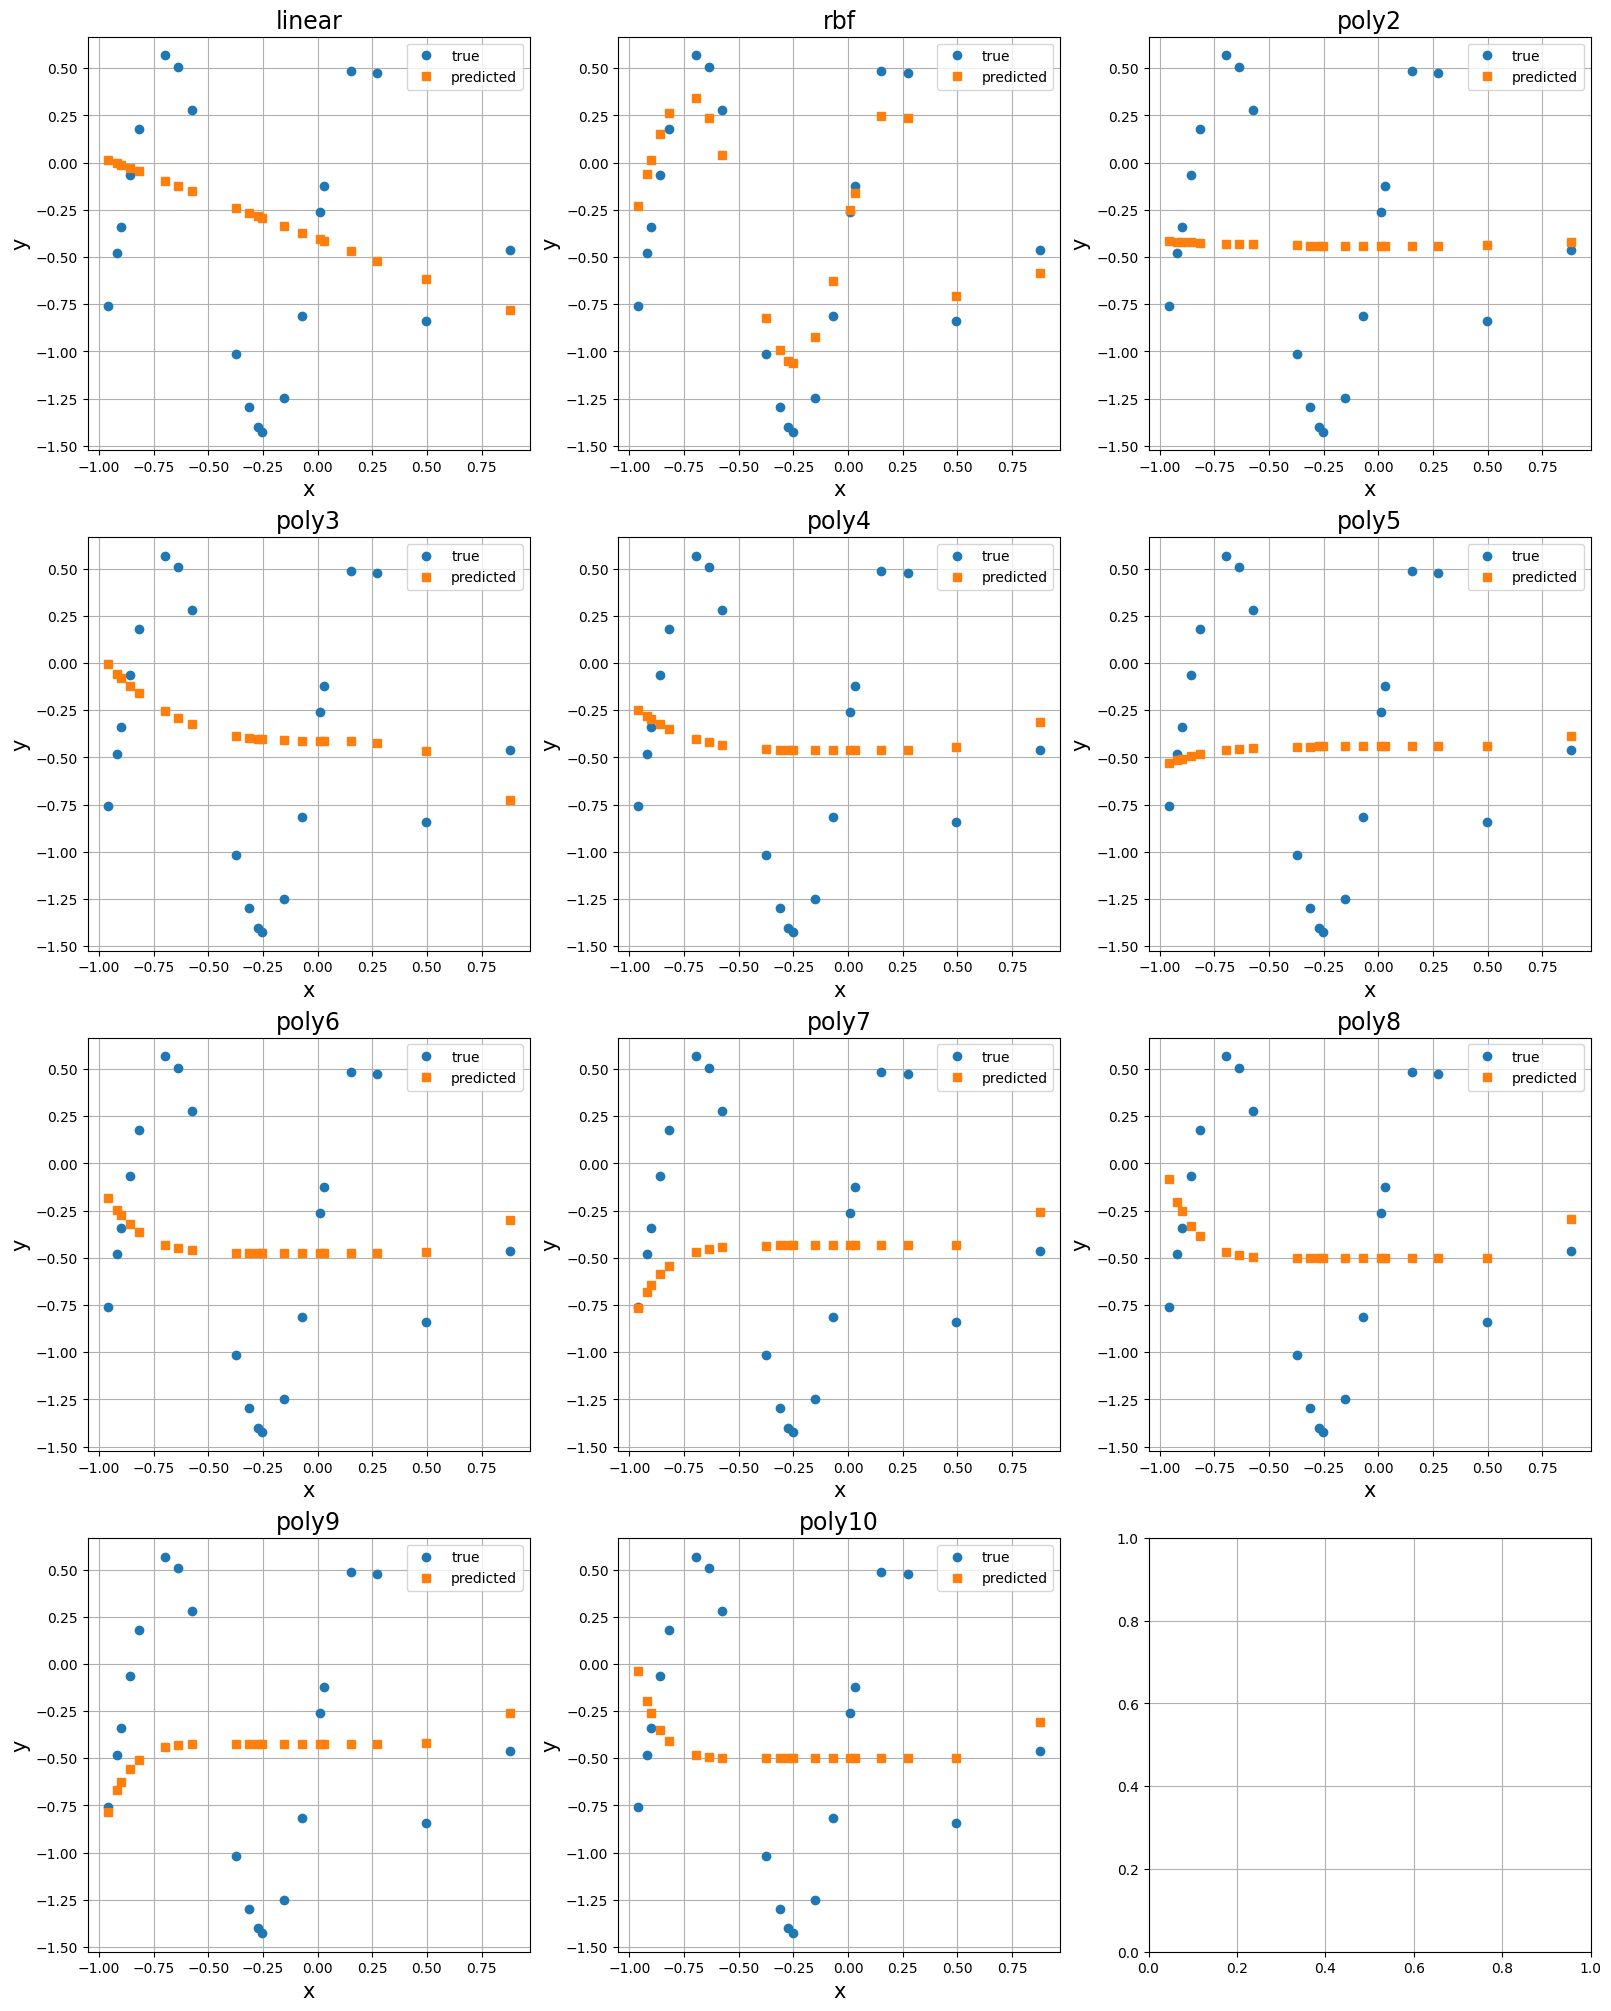

In [8]:
models = {'linear': sk.svm.SVR(kernel='linear'), 'rbf': sk.svm.SVR(kernel='rbf')}
for i in range(2, 11):
    models[f'poly{i}'] = sk.svm.SVR(kernel='poly', degree = i)

fig, axes = plt.subplots(len(models) // 3 + 1, 3, figsize=(16, 20))
i = 0
for (name, model) in models.items():
    ax = axes[i // axes.shape[1],i % axes.shape[1]]
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    ax.plot(x_test, y_test, 'o', label='true')
    ax.plot(x_test, test_pred, 's', label='predicted')
    ax.set(title=name)
    ax.title.set_size(17)
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.legend()
    i += 1
    
    err_train = ((model.predict(x_train) - y_train) ** 2).mean()
    err_test = ((model.predict(x_test) - y_test) ** 2).mean()
    print(name, 'train MSE:', err_train, 'test MSE:', err_test, 'n_support:', model.n_support_.sum())

**Вопросы:**

1. Насколько модели показывают правдоподобные результаты?
1. Какая модель даёт меньшую ошибку MSE?
1. Какая модель использует меньшее количество опорных векторов?

**Ответы:**

1. Наиболее правдоподобный результат, как и прежде, показала RBF модель.
1. Наименьшую ошибку MSE показывает RBF-модель.
1. Наименьшее число опорных векторов имеет RBF-модель.

## Задание №6

Попробуйте улучшить результат, полученный оптимальной моделью из предыдущего задания.
Для этого следует подобрать параметры регуляризации $C$ и $\varepsilon$ одновременно с помощью функции
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
При построении решётки параметров для `C` используйте `np.linspace`, для `epsilon` - `np.logspace`.
Можно подбирать диапазоны поэтапно: от широкого, но с большим шагом, до более маленьго диапазона с меньшим шагом.
Найти самый оптимальный минимум не требуется.
Вполне можно остановиться на MSE $\approx 10^{-5}$.

### Задание №6.1

Постройте график, на котором изображены истинные и предсказанные значения для наилучшей модели.

{'C': 100.0, 'epsilon': 0.01}
MSE = 5.0967433420621965e-05 vectors = 12
CPU times: user 26.4 s, sys: 406 ms, total: 26.8 s
Wall time: 37.9 s


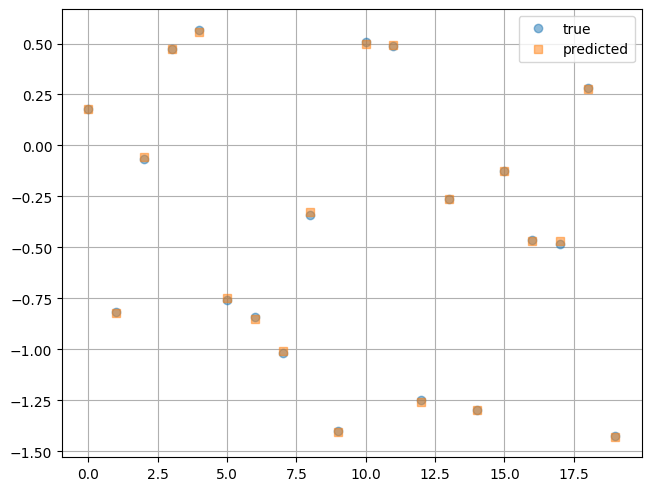

In [9]:
%%time

param_grid = {'C': np.linspace(1, 100, 100), 'epsilon': np.logspace(-2, 3, 100)}
model = sk.model_selection.GridSearchCV(sk.svm.SVR(kernel='rbf'), param_grid, n_jobs=-1)
model.fit(x_train, y_train)
print(model.best_params_)

y_pred = model.best_estimator_.predict(x_test)
fig, ax = plt.subplots()
plt.plot(y_test, 'o', label='true', alpha=0.5)
plt.plot(y_pred, 's', label='predicted', alpha=0.5)
plt.legend()
print("MSE =", ((y_test - y_pred) ** 2).mean(), "vectors =", model.best_estimator_.n_support_.sum())

**Вопросы:**

1. Удалось ли увеличить качество модели по сравнению с предыдущим заданием? Насколько?
1. Сравние количество опорных векторов в полученной модели и в прошлой.
1. Как изменился график предсказанной зависимости?

**Ответы:**

1. Среднеквадратическая ошибка уменьшилась на три порядка.
1. Количество опорных векторов уменьшилось с 62 до 12.
1. Точки оригинала и предсказанной модели на графике зависимости практически совпали.

### Задание №6.2

Постройте графики зависимостей числа опорных векторов от $C$ и от $\varepsilon$.
В качестве свободных параметров используйте те, которые нашли на предыдущем шаге.

CPU times: user 820 ms, sys: 6.11 ms, total: 827 ms
Wall time: 826 ms


[Text(0.5, 0, 'epsilon'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Количество векторов от epsilon')]

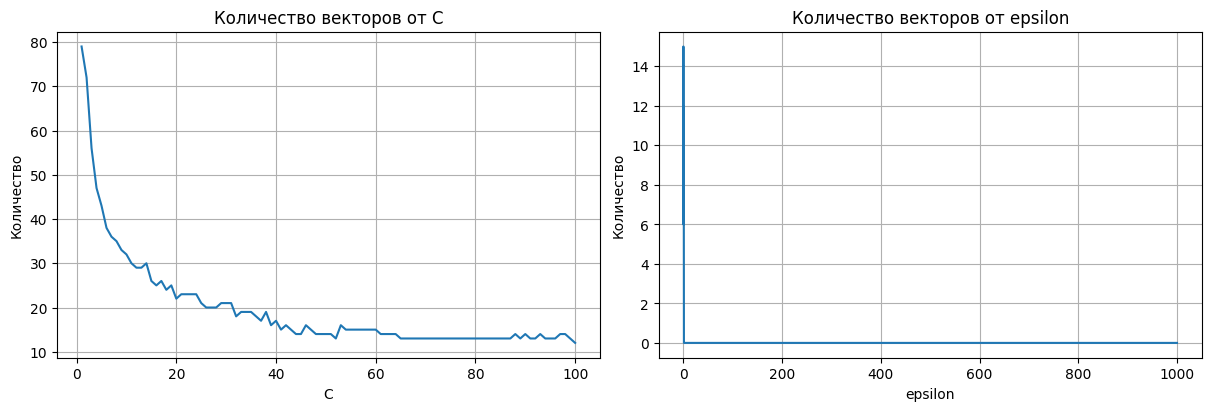

In [10]:
%%time

_, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

n_support = []
for C in param_grid['C']:
    m = sk.svm.SVR(C = C, epsilon=model.best_params_['epsilon'])
    m.fit(x_train,y_train)
    n_support.append(m.n_support_.sum())

ax0.plot(param_grid['C'], n_support)
ax0.set(xlabel='C', ylabel='Количество', title='Количество векторов от C')

n_support = []
for eps in param_grid['epsilon']:
    m = sk.svm.SVR(C = model.best_params_['C'], epsilon=eps)
    m.fit(x_train,y_train)
    n_support.append(m.n_support_.sum())

ax1.plot(param_grid['epsilon'], n_support)
ax1.set(xlabel='epsilon', ylabel='Количество', title='Количество векторов от epsilon')

**Вопросы:**

1. Как влияют параметры регуляризации $C$ и $\varepsilon$ на сложность модели?

**Ответы:**

1. Увеличение параметра $C$ и $\varepsilon$ уменьшает сложность модели.